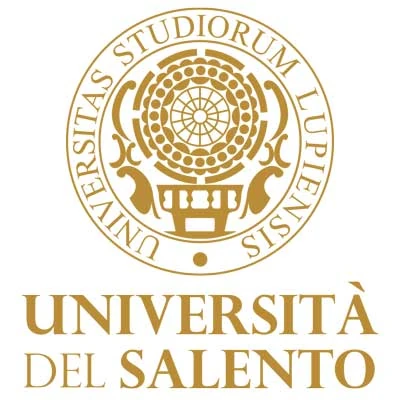

<h1>Analisi sui disordini e confliti in Europa</h1>

Corso di Laurea:
<br>&nbsp; Data Science per le Scienze Umane e Sociali
<br>&nbsp; a.a. 2024/2025<br>
Dipartimento di Scienze Umane e Sociali
<br><br>
Docente:<br>&nbsp; Dott. M. Del Coco
<br><br>
Studenti:<br>
<i>&nbsp; Fasiello Luana</i><br>
<i>&nbsp; Pascali Sofia </i>

<br><br>

# Introduzione
## Scenario

In un contesto di tensioni economiche e geopolitiche sempre più marcate, lo scorso anno oltre 150.000 persone hanno perso la vita a causa di conflitti armati. In risposta a questo scenario, l'ONG statunitense **ACLED - Armed Conflict Location & Event Data** si propone di monitorare la violenza a livello globale in modo imparziale e indipendente, fornendo **dati disaggregati con cadenza bisettimanale**, suddivisi per **tipologia di evento**.

L’analisi di questi dati, che descrivono fenomeni complessi legati al comportamento umano, presenta una sfida significativa. A causa dell’eterogeneità, dell’elevata variabilità e dell’alta dimensionalità delle informazioni raccolte, non è possibile costruire un modello interpretativo a priori. L’obiettivo sarà quindi quello di far emergere regolarità e pattern significativi direttamente dai dati.

## Obiettivi
### 1. Valutare la qualità dei dati

Con la crescente disponibilità di dati disaggregati su disordini e conflitti, emergono nuove e vecchie preoccupazioni legate ai **bias informativi**. Raramente i dataset ne sono esenti. La letteratura suggerisce di prestare particolare attenzione a possibili distorsioni sistematiche dovute a omissioni, inflazioni o dichiarazioni errate.

Come sottolineato da Erin Miller et al. in *"An Agenda for Addressing Bias in Conflict Data"*, il sospetto verso i dati sui conflitti può derivare da molteplici fattori, inclusa la fiducia nei processi di raccolta. In questo progetto, adotteremo un approccio analitico volto a "lasciar parlare i dati", valutandone la qualità attraverso indicatori e metriche standard visti durante il corso.

<br>

### 2. Elaborare un algoritmo di classificazione

Un secondo obiettivo sarà la costruzione di **modelli di classificazione** in grado di prevedere, sulla base di variabili selezionate, il **tipo di disordine** che potrebbe verificarsi in una specifica area geografica, nonché l’**entità in termini di interazione umana**.

<span style="background-color:red">L'elaborazione di un modello predittivo potrebbe fornire strumenti utili ad anticipare e gestire in modo più efficace eventuali situazioni di conflitto, supportando interventi preventivi e politiche di sicurezza più informate.</span>

<span style="background-color:blue;">L'obiettivo del nostro progetto è sviluppare un algoritmo predittivo in grado di identificare e classificare le tipologie di disordini sociali che potrebbero manifestarsi in diversi contesti geografici. L'algoritmo utilizzerà una serie di dati input, tra cui il **Paese** di riferimento, la **popolazione** e altri fattori rilevanti, per prevedere la natura e la probabilità di eventuali disordini.</span>

# 1. Dataset

Il dataset selezionato rappresenta lo scenario del **continente europeo** in un **intervallo temporale di sei mesi**, dal **1° gennaio al 1° giugno 2024**.

In [73]:
import os
import pandas as pd
import numpy as np
import random
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dataset
dataset = pd.read_csv("/Users/Sofia/Documents/DATA MINING/NEW REPOSITORY/Europe-full.csv")  # path locale corretto

# Info iniziale
dataset.info(verbose=True)

Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37025 entries, 0 to 37024
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       37025 non-null  object 
 1   event_date          37025 non-null  object 
 2   year                37025 non-null  int64  
 3   time_precision      37025 non-null  int64  
 4   disorder_type       37025 non-null  object 
 5   event_type          37025 non-null  object 
 6   sub_event_type      37025 non-null  object 
 7   actor1              37025 non-null  object 
 8   assoc_actor_1       15696 non-null  object 
 9   inter1              37025 non-null  int64  
 10  actor2              10342 non-null  object 
 11  assoc_actor_2       941 non-null    object 
 12  inter2              37025 non-null  int64  
 13  interaction         37025 non-null  int64  
 14  civilian_targeting  1353 non-null   

Dopo aver caricato in memoria il nostro dataset, possiamo subito osservare che è composto da **32 variabili (features)** e contiene oltre **37.000 osservazioni**.

Il comando `dataset.info()` ci fornisce una panoramica dettagliata della struttura del dataset, indicando il tipo di ciascuna variabile, il numero di valori non nulli e la presenza di eventuali valori mancanti, che analizzeremo più approfonditamente nella sezione relativa alla [Data Quality](#5.-Data-Quality).

Per familiarizzare con il contenuto, visualizziamo un primo estratto del dataset, mostrando le prime 5 righe.

In [74]:
dataset.head()  # visualizziamo le prime 5 righe del dataset

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best
0,RUS16934,24 May 2024,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Ukraine (2019-) Air Force,NaN,8,...,50.4478,38.7028,2,Yandex News,National,"On 24 May 2024, Ukrainian military struck with...",0,NaN,1716915220,NaN
1,UKR161108,24 May 2024,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Russia (2000-),NaN,8,...,43.5170,31.2450,1,Suspilne Media,Subnational,"Interception: On 24 May 2024, Russian military...",0,NaN,1716915222,NaN
2,ALB1312,24 May 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Albania),NaN,6,...,41.3275,19.8189,1,Albanian Daily News,National,"On 24 May 2024, dozens gathered in Tirana in p...",0,crowd size=dozens,1716919043,92480.0
3,AUT1875,24 May 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Austria),NaN,6,...,48.2088,16.3702,1,Kurier; Niederosterreichische Nachrichten,National,"On 24 May 2024, 20 to 25 people, including a c...",0,crowd size=20 to 25,1716919044,10760.0
4,BEL3400,24 May 2024,2024,1,Strategic developments,Strategic developments,Other,Unidentified Armed Group (Belgium),NaN,3,...,50.8040,4.3348,1,La Libre,National,"Other: On 24 May 2024, at around 5:30 am, an u...",0,NaN,1716919044,NaN


## 1.1 Le feature
Le feature che seguono descrivono ogni evento in maniera dettagliata, quasi con un taglio giornalistico, rispondendo alla tipiche 5W: Who, What, Where, When e, in parte, anche Why, grazie ai campi testuali come notes e tags. <br>
Per facilitare la comprensione di tutti gli attributi, proponiamo quindi un breve schema riassuntivo in gruppi. 
<br>
<img src="Evento.png" alt="Schema feature raggruppate" width="550">
<br>
A seguire abbiamo, invece, l'elenco delle feature con l'indicazione del tipo di dato che queste contegono e della funzione informativa che svolgono all’interno del dataset. 

## 1.2 Subset selection
Per ridurre il carico computazionale e prevenire problematiche legate al surriscaldamento del PC durante le fasi di analisi e modellazione, si procede con un ***campionamento casuale semplice senza reinserimento*** di 1000 osservazioni dal dataset originale.  
Questo approccio garantisce un’uguale probabilità di selezione per ogni riga, mantenendo al contempo la variabilità del dataset.

In [75]:
# Campionamento casuale di 1000 righe
subset_dim = 1000
random_observation = random.sample(range(len(dataset)), subset_dim)
subset = dataset.loc[random_observation].copy()

# Salvataggio subset
if not os.path.exists("dataset"):
    os.makedirs("dataset")
subset.to_csv("dataset/Europe-" + str(subset_dim) + ".csv", index=False)

# Output informazioni
print(subset.describe())
print(f"Subset consists of {subset.shape[0]} Rows × {subset.shape[1]} Columns")

         year  time_precision       inter1      inter2  interaction  \
count  1000.0     1000.000000  1000.000000  1000.00000  1000.000000   
mean   2024.0        1.007000     6.629000     0.97500    56.285000   
std       0.0        0.094657     1.798498     2.30471    23.285532   
min    2024.0        1.000000     1.000000     0.00000    10.000000   
25%    2024.0        1.000000     6.000000     0.00000    60.000000   
50%    2024.0        1.000000     6.000000     0.00000    60.000000   
75%    2024.0        1.000000     8.000000     1.00000    80.000000   
max    2024.0        3.000000     8.000000     8.00000    80.000000   

               iso     latitude    longitude  geo_precision   fatalities  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    616.518000    48.473292    24.021041       1.331000     0.318000   
std     233.749816     4.191044    15.438093       0.493642     2.441892   
min      40.000000    28.499200   -21.939700       1.000

Nel dettaglio:
- Viene definita la dimensione del campione (`subset_dim = 1000`) e selezionati **1000 indici univoci** con la funzione `random.sample()`.
- Le righe corrispondenti vengono estratte dal dataset principale e copiate in un nuovo oggetto chiamato `subset`, in modo da evitare modifiche involontarie sull'originale.
- Il subset viene salvato in locale come file `.csv` all’interno di una cartella dedicata, creata automaticamente se non presente.
- Infine, vengono stampate le statistiche descrittive delle variabili numeriche e la dimensione del subset, a conferma della corretta estrazione.

Questa strategia permette di lavorare in modo efficiente su un sottoinsieme rappresentativo dei dati reali, mantenendo la possibilità di estendere successivamente le analisi all’intero dataset.

# 2. Statistiche descrittive

Analizziamo le **variabili numeriche** del dataset, calcolando le principali misure statistiche (media, deviazione standard, minimo, massimo, quartili) utili a descrivere la distribuzione dei dati. Per evitare distorsioni, escludiamo dalle analisi le feature numeriche che rappresentano codici identificativi (es. ISO, country codes), in quanto non costituiscono variabili quantitative rilevanti.

Applichiamo il metodo `.describe()` su un sottoinsieme delle variabili numeriche significative, ovvero escludendo attributi puramente identificativi come codici ISO o denominazioni amministrative.  
Otteniamo così, per ciascuna variabile quantitativa, le seguenti statistiche:

- **media** (`mean`)
- **deviazione standard** (`std`)
- **valori minimo e massimo**
- **primo (25%), secondo (50%, mediana) e terzo quartile (75%)**

Questi indicatori sono fondamentali per comprendere la distribuzione, la dispersione e la simmetria delle variabili prima di procedere con eventuali normalizzazioni o modellizzazioni.

In [76]:
# Selezione delle colonne numeriche escludendo codici identificativi
# (es. iso, country, region, admin1/admin2/admin3)
exclude_columns = ['iso', 'country', 'region', 'admin1', 'admin2', 'admin3']
numeric_cols = subset.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in exclude_columns]

# Calcolo delle statistiche descrittive per le variabili numeriche rilevanti
subset[numeric_cols].describe().T  # Trasposta per leggibilità (righe = variabili)

,count,mean,std,min,25%,50%,75%,max
year,1000.0,2.024000e+03,0.000000e+00,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03
time_precision,1000.0,1.007000e+00,9.465707e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
inter1,1000.0,6.629000e+00,1.798498e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,8.000000e+00
inter2,1000.0,9.750000e-01,2.304710e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00
interaction,1000.0,5.628500e+01,2.328553e+01,1.000000e+01,6.000000e+01,6.000000e+01,8.000000e+01,8.000000e+01
latitude,1000.0,4.847329e+01,4.191044e+00,2.849920e+01,4.723738e+01,4.855365e+01,5.049878e+01,6.964870e+01
longitude,1000.0,2.402104e+01,1.543809e+01,-2.193970e+01,9.884925e+00,3.311870e+01,3.725275e+01,5.856680e+01
geo_precision,1000.0,1.331000e+00,4.936423e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
fatalities,1000.0,3.180000e-01,2.441892e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.900000e+01
timestamp,1000.0,1.711427e+09,3.675415e+06,1.704834e+09,1.708472e+09,1.711491e+09,1.715131e+09,1.716919e+09


## 2.1 Variabili Categoriche: Frequenze e Trasformazione in feature booleane
Passiamo ora all’analisi delle **variabili categoriche**, per le quali identificheremo le diverse modalità presenti e ne calcoleremo la frequenza assoluta.

Nello specifico, sono state identificate 3 variabili categoriche particolarmente significative per l’analisi degli eventi: `disorder_type`, `event_type` e `sub_event_type`, che descrivono la natura e la tipologia degli eventi registrati.  
Per ciascuna di esse vengono eseguite le seguenti operazioni:

- **Identificazione delle modalità uniche** presenti nel campione (cioè le categorie distinte assunte dalla variabile);
- **Calcolo della frequenza assoluta** per ogni modalità, così da quantificare la diffusione relativa delle diverse tipologie di disordine;
- **Codifica binaria delle modalità**, creando una nuova colonna per ciascuna categoria che assume valore `True` se l’osservazione corrisponde alla modalità in esame, `False` altrimenti.

La codifica dei nomi delle nuove colonne è strutturata come segue:
- Si utilizza un **prefisso** di due lettere per identificare la variabile sorgente:
  - `ds_` per `disorder_type`
  - `et_` per `event_type`
  - `set_` per `sub_event_type`
- Si rimuovono spazi vuoti e simboli speciali, e il testo viene convertito in **minuscolo**.

Questa trasformazione rende le informazioni categoriali compatibili con i modelli di *machine learning*, che richiedono input numerici o booleani.  
Inoltre, ci consente di esplorare in modo più granulare la struttura del dataset e le relazioni tra le variabili testuali e gli altri attributi numerici o geografici.

> **Esempio**  
> Se in `event_type` è presente la modalità `"Battles"`, verrà generata una nuova colonna `et_battles` in cui il valore sarà `True` per le osservazioni in cui `event_type == "Battles"`.

In [77]:
# Variabili categoriche da trasformare in variabili dummy
categorical_vars = [ "disorder_type", "event_type", "sub_event_type" ]
categorical_shorts = {
    "disorder_type" : "ds",
    "event_type" : "et",
    "sub_event_type" : "set"
}

# Calcolo delle modalità presenti in ciascuna variabile categorica
modalita = {}
for cat in categorical_vars:
    modalita[cat] = subset[cat].value_counts().to_dict()

# Stampa delle frequenze assolute per ciascuna modalità
for cat in modalita:
    print(f"\nFrequenze assolute per '{cat}':")
    for mod, freq in modalita[cat].items():
        print(f"  {mod}: {freq}")

# Creazione delle variabili dummy (feature booleane per ciascuna modalità)
mod_list = []

for cat in categorical_vars:
    for mod in modalita[cat]:
        current_mod = mod.replace(" ", "").replace("/", "")
        current_mod = categorical_shorts[cat] + "_" + current_mod.lower()
        mod_list.append(current_mod)

        # Colonna booleana: True se la modalità è presente, False altrimenti
        subset[current_mod] = subset[cat].str.lower().str.strip() == mod.lower().strip()

# Visualizzazione delle prime righe del dataset aggiornato
subset.head()


Frequenze assolute per 'disorder_type':
  Political violence: 509
  Demonstrations: 439
  Strategic developments: 52

Frequenze assolute per 'event_type':
  Protests: 432
  Explosions/Remote violence: 383
  Battles: 122
  Strategic developments: 52
  Riots: 8
  Violence against civilians: 3

Frequenze assolute per 'sub_event_type':
  Peaceful protest: 427
  Shelling/artillery/missile attack: 253
  Air/drone strike: 127
  Armed clash: 121
  Disrupted weapons use: 45
  Violent demonstration: 7
  Looting/property destruction: 6
  Protest with intervention: 5
  Attack: 3
  Remote explosive/landmine/IED: 3
  Mob violence: 1
  Non-state actor overtakes territory: 1
  Other: 1


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,set_armedclash,set_disruptedweaponsuse,set_violentdemonstration,set_lootingpropertydestruction,set_protestwithintervention,set_attack,set_remoteexplosivelandmineied,set_mobviolence,set_non-stateactorovertakesterritory,set_other
17119,RUS14708,12 March 2024,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Ukraine (2019-) Air Force,NaN,8,...,False,False,False,False,False,False,False,False,False,False
4566,UKR159246,05 May 2024,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,8,...,False,False,False,False,False,False,False,False,False,False
29062,UKR146588,31 January 2024,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Russia (2000-) Air Force,NaN,8,...,False,False,False,False,False,False,False,False,False,False
6246,ESP16977,28 April 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Spain),Ecologists in Action,6,...,False,False,False,False,False,False,False,False,False,False
32266,UKR145335,21 January 2024,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,8,...,True,False,False,False,False,False,False,False,False,False


Ricapitolando, abbiamo codificato le modalità delle variabili categoriche in nuove feature booleane, che vengono impostate a `True` ogni volta che una determinata modalità è presente nell’osservazione.

Per rendere queste nuove colonne facilmente leggibili e gestibili, abbiamo:
- rimosso spazi e caratteri speciali dai nomi delle modalità;
- assegnato un prefisso di due lettere in base alla variabile di origine (es. `et_battles` per la modalità *battles* di `event_type`).

Ora possiamo osservare la **frequenza** con cui ciascuna modalità si presenta nel dataset, riferita al primo semestre del 2024 in Europa.

In [78]:
subset[ mod_list ].describe()

,ds_politicalviolence,ds_demonstrations,ds_strategicdevelopments,et_protests,et_explosionsremoteviolence,et_battles,et_strategicdevelopments,et_riots,et_violenceagainstcivilians,set_peacefulprotest,...,set_armedclash,set_disruptedweaponsuse,set_violentdemonstration,set_lootingpropertydestruction,set_protestwithintervention,set_attack,set_remoteexplosivelandmineied,set_mobviolence,set_non-stateactorovertakesterritory,set_other
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,509,561,948,568,617,878,948,992,997,573,...,879,955,993,994,995,997,997,999,999,999


In [79]:
modalita.keys()
modalita['disorder_type'].keys()

dict_keys(['Political violence', 'Demonstrations', 'Strategic developments'])

/var/folders/tf/rbl29ygj1yd29tqghljbpswh0000gn/T/ipykernel_10481/1964387682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cur = sns.barplot(
/var/folders/tf/rbl29ygj1yd29tqghljbpswh0000gn/T/ipykernel_10481/1964387682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cur = sns.barplot(
/var/folders/tf/rbl29ygj1yd29tqghljbpswh0000gn/T/ipykernel_10481/1964387682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cur = sns.barplot(


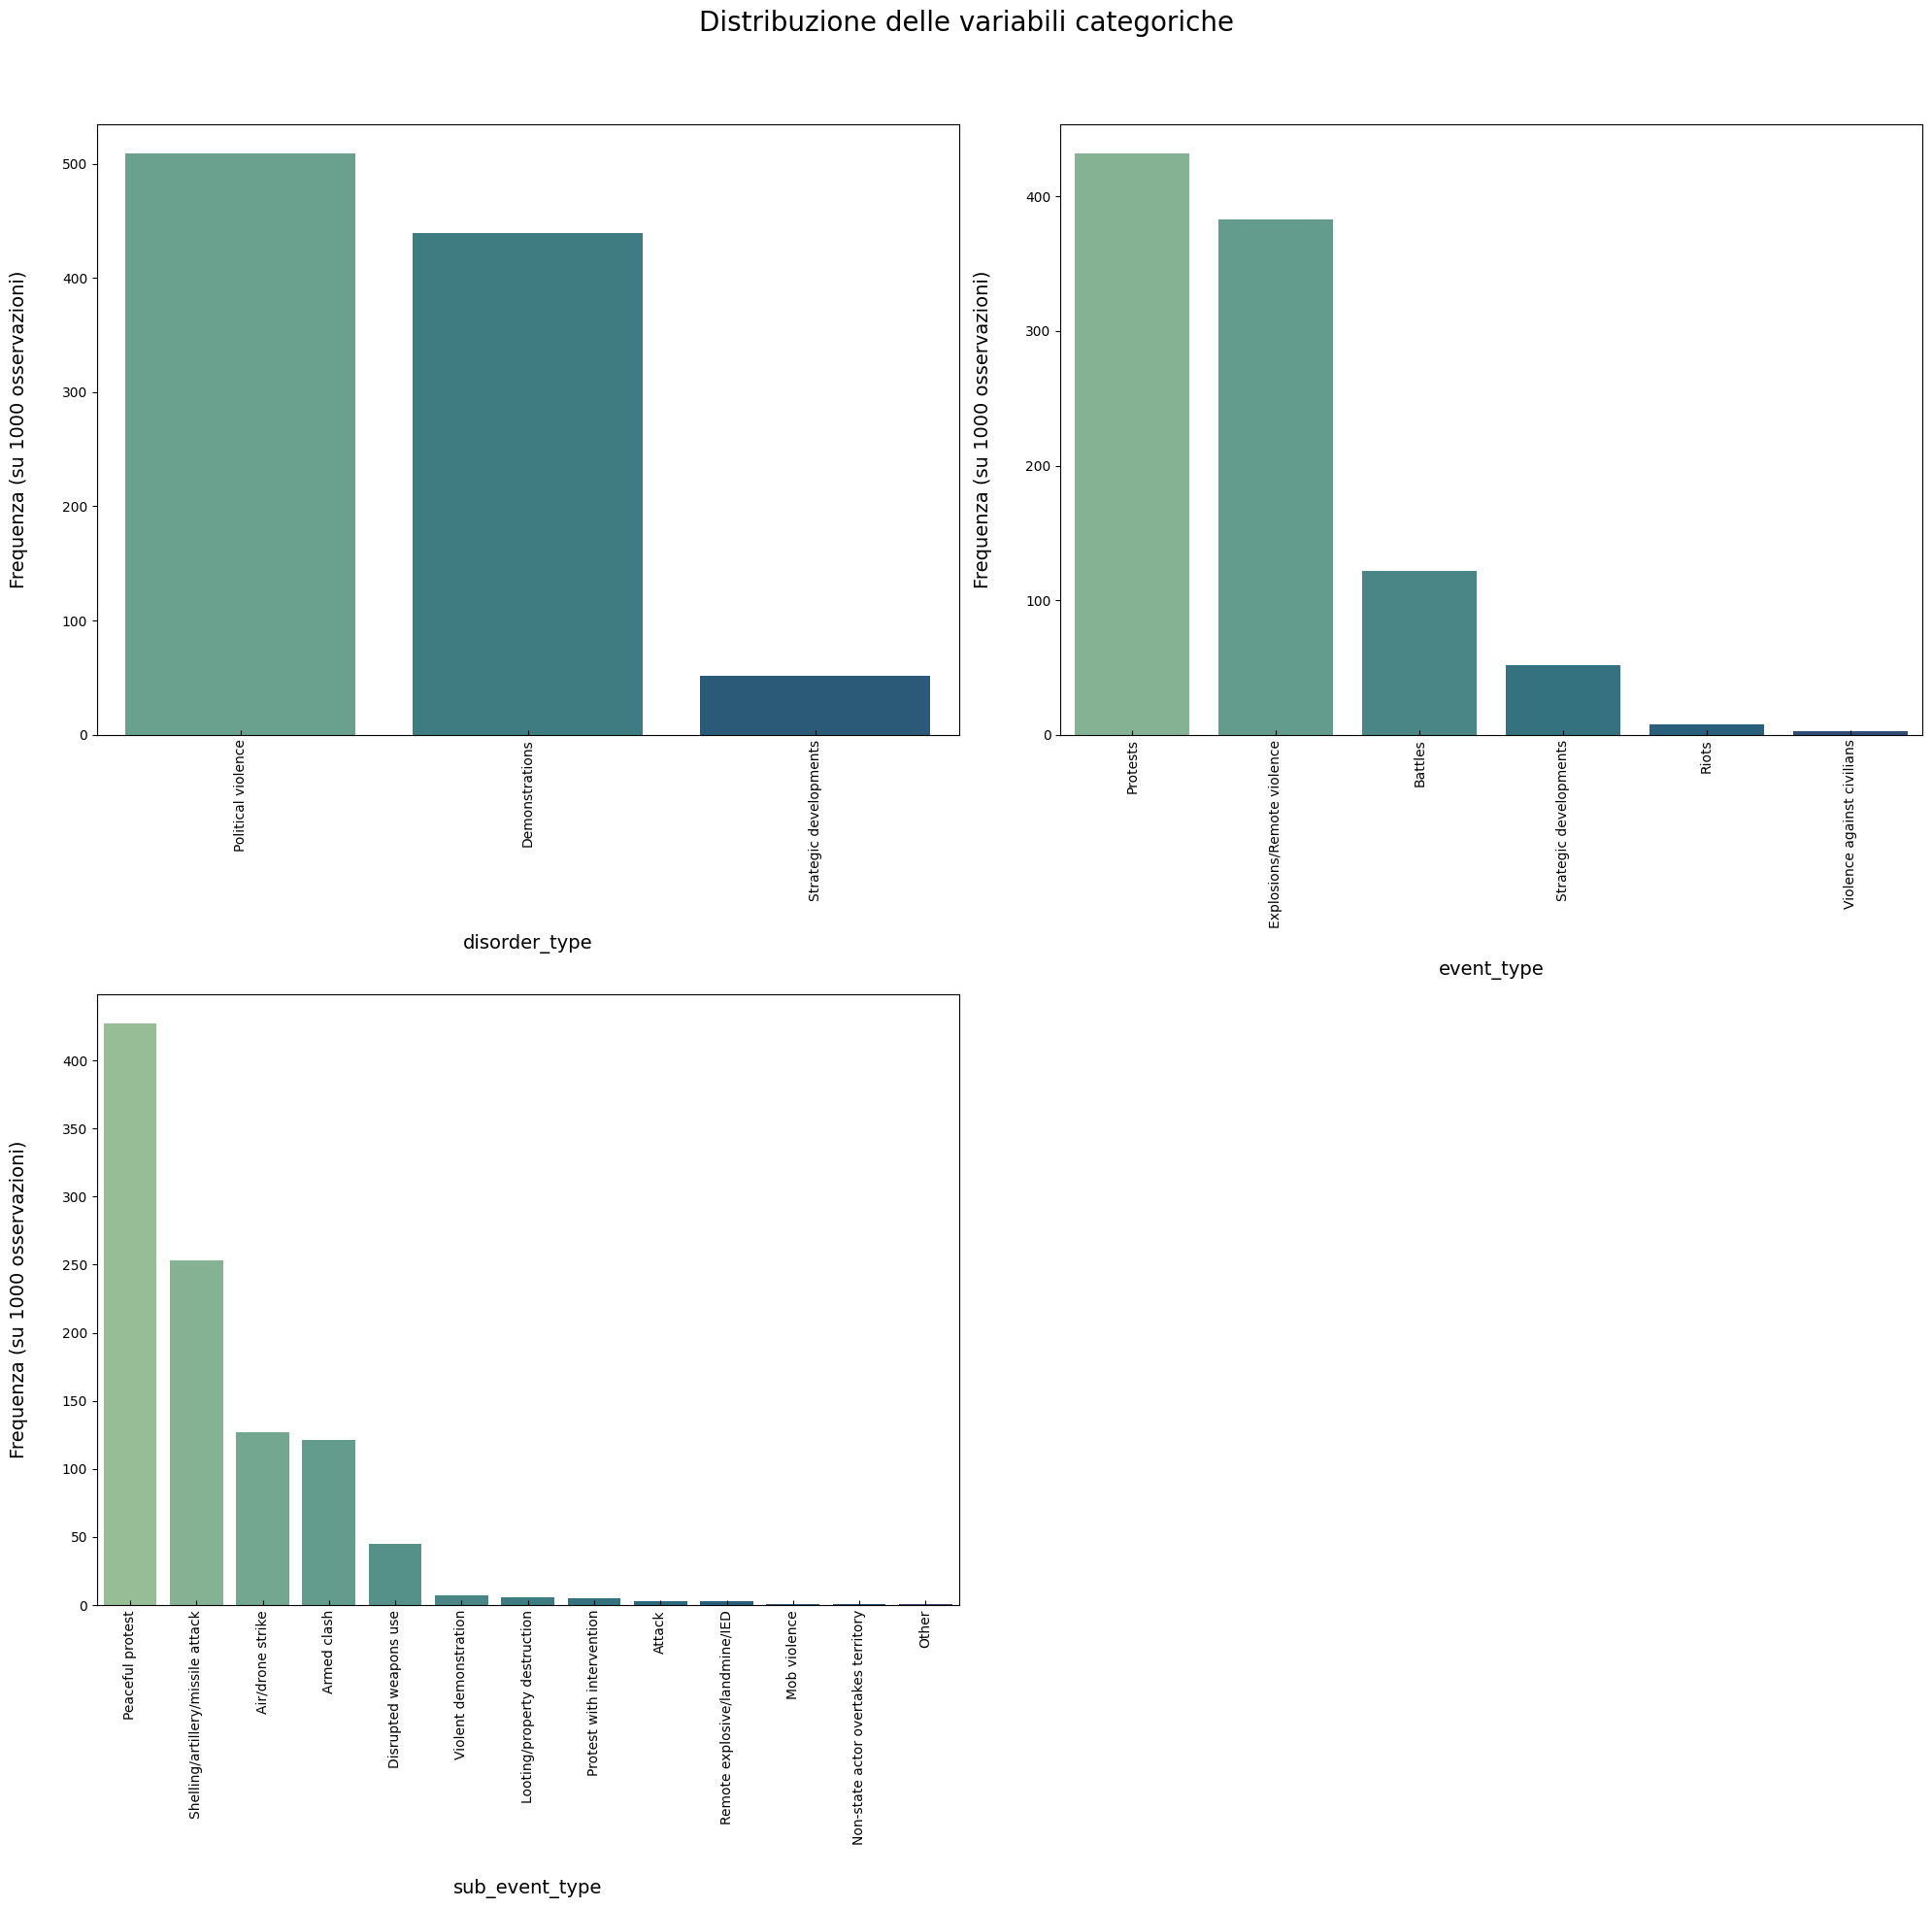

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Griglia 2x2, anche se solo 3 grafici (l'ultimo rimane vuoto)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
fig.suptitle("Distribuzione delle variabili categoriche", fontsize=20)

# Ciclo sulle prime 3 variabili in 'modalita'
for i, feature in enumerate(list(modalita.keys())[:3]):
    cur = sns.barplot(
        x=list(modalita[feature].keys()),       # Etichette asse x
        y=list(modalita[feature].values()),     # Frequenze
        ax=ax[i // 2, i % 2],
        palette="crest"  # palette visiva (modificabile)
    )
    ax[i // 2, i % 2].set_xlabel(feature, labelpad=25, fontsize=14)
    ax[i // 2, i % 2].set_ylabel(f"Frequenza (su {subset_dim} osservazioni)", labelpad=25, fontsize=14)
    cur.tick_params(axis='x', labelrotation=90, direction="in")

# Rimuovo eventuale quarto subplot vuoto
ax[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Per non tagliare il titolo
plt.show()


Un altro aspetto che potrebbe essere interessante da visualizzare riguarda la frequenza di ogni tipologia di evento nel continente.

Il grafico che segue rappresenta la distribuzione nel territorio europeo di casi di <u>violenza politica</u>. 
Ogni marker rappresenta un evento, mentre il popup associato fornisce due informazioni chiave:
- il numero di persone coinvolte (sia attivamente che passivamente);
- il numero di morti, correlati all'evento, registrati.

La visualizzazione ci consente di cogliere a colpo d’occhio le aree più colpite.

In [81]:
%pip install folium
import folium
from folium.plugins import MarkerCluster

center_europe = [55.7522, 37.6156]
my_map = folium.Map(center_europe, zoom_start=5)

mc = MarkerCluster()
location = []

# Iterazione sul subset per eventi di tipo "Political violence"
for row in subset.itertuples():
    if row.disorder_type == "Political violence":
        location = [row.latitude, row.longitude]
        mc.add_child(folium.Marker(location, popup=f"Persone<br>{row.interaction}<br><br>Morti<br>{row.fatalities}"))

my_map.add_child(mc)
my_map



Note: you may need to restart the kernel to use updated packages.


## 2.2 Heatmap delle manifestazioni

In questa sezione analizziamo la distribuzione spaziale delle **manifestazioni** (classificate nel dataset come `disorder_type = Demonstrations`) nei primi sei mesi del 2024. 
Per farlo, utilizziamo una **mappa termica (HeatMap)**, ossia una rappresentazione che consente di visualizzare la densità geografica degli eventi su una mappa interattiva.

Il codice effettua un ciclo su tutte le osservazioni del `subset`, selezionando solo quelle relative alle manifestazioni. Per ciascun evento, vengono estratte la *latitudine* e la *longitudine*, a cui si associa anche l’intensità dell’interazione (`interaction`) per ponderare la “forza” del punto sulla mappa.

La **HeatMap risultante** evidenzia le aree geografiche dove si è registrata la maggiore concentrazione di manifestazioni, con intensità crescente del colore in base al numero e all’intensità degli eventi. Questo tipo di visualizzazione è utile per individuare **pattern di aggregazione territoriale** e **focolai di mobilitazione sociale** in Europa.

> Nota tecnica: l’argomento `interaction` viene utilizzato come peso per ciascun punto della mappa. Più alto è il valore, maggiore sarà l’impatto visivo di quell’evento sulla heatmap.

In [82]:
from folium.plugins import HeatMap

# Inizializza la mappa centrata sull'Europa
my_map = folium.Map(center_europe, zoom_start=3)

# Lista per raccogliere coordinate e intensità delle dimostrazioni
location = []

# Ciclo sulle righe del dataset per identificare gli eventi di tipo "Demonstrations"
for _, row in subset.iterrows():
    if row["disorder_type"] == "Demonstrations":
        location.append([row["latitude"], row["longitude"], row["interaction"]])

# Aggiunta della heatmap alla mappa
HeatMap(location).add_to(my_map)

# Visualizzazione della mappa
my_map

## 2.3 Distribuzione geografica degli eventi di "Strategic developments"

In ultima analisi, analizziamo la distribuzione geografica degli eventi classificati come **Strategic developments**. Si tratta di disordini che indicano eventi di rilievo strategico per il contesto locale o internazionale, che non rientrano nelle tradizionali categorie di proteste o violenze, ma che ne influenzano dinamiche e sviluppi.

La mappa seguente visualizza questi eventi sul territorio europeo. Ogni punto rappresenta un evento, e il colore **arancione** è stato scelto per distinguerli graficamente. 
Il popup associato a ciascun marcatore riporta il numero di persone coinvolte, così come riportato dalla variabile `interaction`.

In [83]:
# Centriamo la mappa sull'Europa
center_europe = [48.6580611, 24.1436051]
my_map = folium.Map(location=center_europe, zoom_start=5)

# Iteriamo sulle osservazioni e aggiungiamo un marker per ogni evento di tipo "Strategic developments"
for index, row in subset.iterrows():
    if row["disorder_type"] == "Strategic developments":
        location = [row["latitude"], row["longitude"]]
        folium.Marker(
            location=location,
            popup=f"Persone: {row['interaction']}",
            icon=folium.Icon(color='orange')
        ).add_to(my_map)

my_map

# 3. Analisi esplorativa

Un’ulteriore analisi che possiamo effettuare sulle variabili categoriche viste in precedenza riguarda l’***ipotesi*** che alcuni tipi di eventi o sotto-eventi si verifichino esclusivamente in presenza di una specifica tipologia di disordine.  
In altre parole, ci chiediamo se esistano delle **corrispondenze univoche** tra `disorder_type` e le variabili `event_type` e `sub_event_type`.

Per verificarlo, costruiamo due <u> dizionari</u> in cui andiamo a contare, per ciascuna modalità di `disorder_type`, quante volte si presentano le diverse modalità di evento (`event_type`) e sotto-evento (`sub_event_type`).  
L'obiettivo è evidenziare eventuali ***pattern*** o ***vincoli*** forti tra le categorie.

I risultati verranno stampati in forma leggibile grazie all’utilizzo del modulo `pprint` (Pretty Print).

In [84]:
import pprint as pt  # modulo per una stampa leggibile dei dizionari

# Dizionari per contenere le frequenze degli eventi principali e dei sotto-eventi per ciascun tipo di disordine
disorder_type_et_fq = {}
disorder_type_set_fq = {}

# Ciclo su ciascuna modalità della variabile 'disorder_type'
for disorder in modalita["disorder_type"]:
    
    # Conteggio delle occorrenze di ogni 'event_type' all'interno di ciascun tipo di disordine
    disorder_type_et_fq[disorder] = subset.loc[
        subset["disorder_type"] == disorder, "event_type"
    ].value_counts().to_dict()
    
    # Conteggio delle occorrenze di ogni 'sub_event_type' all'interno di ciascun tipo di disordine
    disorder_type_set_fq[disorder] = subset.loc[
        subset["disorder_type"] == disorder, "sub_event_type"
    ].value_counts().to_dict()

# Stampa leggibile delle frequenze per ogni tipo di evento
print(" *** Disorder type → Event type mapping ***\n")
pt.pprint(disorder_type_et_fq)

print("\n\n *** Disorder type → Sub-event type mapping ***\n")
pt.pprint(disorder_type_set_fq, width=60)  # larghezza ridotta per evitare linee troppo lunghe

 *** Disorder type → Event type mapping ***

{'Demonstrations': {'Protests': 432, 'Riots': 7},
 'Political violence': {'Battles': 122,
                        'Explosions/Remote violence': 383,
                        'Riots': 1,
                        'Violence against civilians': 3},
 'Strategic developments': {'Strategic developments': 52}}


 *** Disorder type → Sub-event type mapping ***

{'Demonstrations': {'Peaceful protest': 427,
                    'Protest with intervention': 5,
                    'Violent demonstration': 7},
 'Political violence': {'Air/drone strike': 127,
                        'Armed clash': 121,
                        'Attack': 3,
                        'Mob violence': 1,
                        'Non-state actor overtakes territory': 1,
                        'Remote explosive/landmine/IED': 3,
                        'Shelling/artillery/missile attack': 253},
 'Strategic developments': {'Disrupted weapons use': 45,
                            'Loot

Visualizziamo ora due grafici a barre impilate (*stacked bar plots*) per analizzare come si distribuiscono i **tipi di eventi** (`event_type`) e i **sotto-eventi** (`sub_event_type`) rispetto alle principali categorie di disordine (`disorder_type`): *Political violence*, *Demonstrations* e *Strategic developments*. 

Il <u> primo grafico</u> mostra, per ciascuna tipologia di disordine, la composizione in termini di **eventi principali**.  
Il <u> secondo grafico</u>, invece, dettaglia la composizione interna rispetto ai **sotto-eventi**, fornendo così un'indicazione più granulare della natura delle attività registrate.

Questa visualizzazione ci permette di capire **quali eventi o sotto-eventi sono esclusivi o predominanti** in certe categorie di disordine, offrendo spunti utili per l'identificazione di pattern o fenomeni specifici.

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')]

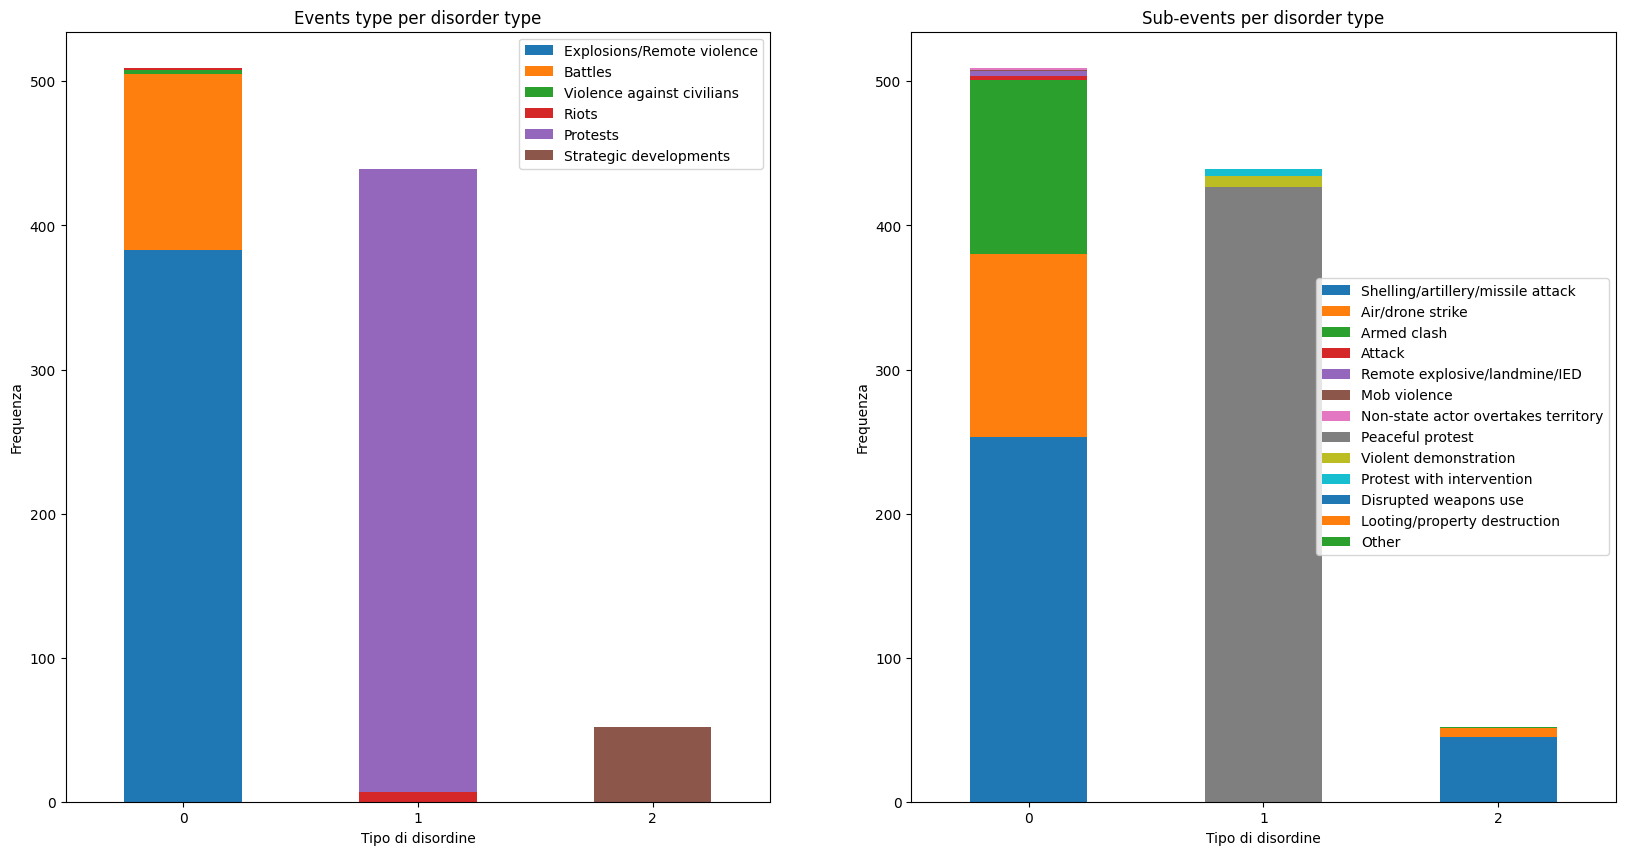

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Costruiamo DataFrame per la frequenza di event_type e sub_event_type per ciascun disorder_type
et_mods_fq = pd.DataFrame([
        disorder_type_et_fq['Political violence'],
        disorder_type_et_fq['Demonstrations'],
        disorder_type_et_fq['Strategic developments'] ])

set_mods_fq = pd.DataFrame([
        disorder_type_set_fq['Political violence'],
        disorder_type_set_fq['Demonstrations'],
        disorder_type_set_fq['Strategic developments'] ])

# Creazione della figura con 2 sottografi affiancati
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Grafico 1: Distribuzione degli event_type per ciascun disorder_type
et_mods_fq.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Events type per disorder type')
axs[0].set_ylabel('Frequenza')
axs[0].set_xlabel('Tipo di disordine')
axs[0].set_xticks([0, 1, 2])
axs[0].set_xticklabels(et_mods_fq.index, rotation=0)

# Grafico 2: Distribuzione dei sub_event_type per ciascun disorder_type
set_mods_fq.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Sub-events per disorder type')
axs[1].set_ylabel('Frequenza')
axs[1].set_xlabel('Tipo di disordine')
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(set_mods_fq.index, rotation=0)

Abbiamo costruito una tabella che mostra la distribuzione dei principali **eventi (`event_type`)** per ciascuna tipologia di **disordine (`disorder_type`)**.

Ora, utilizzando il DataFrame `et_mods_fq`, possiamo visualizzare un riassunto, per ogni disordine osservato (*Political violence*, *Demonstrations*, *Strategic developments*), del **numero assoluto di occorrenze** dei diversi tipi di evento associati. Questo consente di analizzare rapidamente quali tipologie di evento sono prevalenti all'interno di ciascuna categoria di disordine.

In [86]:
et_mods_fq

,Explosions/Remote violence,Battles,Violence against civilians,Riots,Protests,Strategic developments
0,383.0,122.0,3.0,1.0,NaN,NaN
1,NaN,NaN,NaN,7.0,432.0,NaN
2,NaN,NaN,NaN,NaN,NaN,52.0


Analizziamo ora la distribuzione dell'evento **"Riots"** nelle tre principali tipologie di disordini: *Political violence*, *Demonstrations* e *Strategic developments*. 

Dall’analisi preliminare delle frequenze, sappiamo che *Riots* si manifesta sia all’interno delle **dimostrazioni** sia nei contesti di **violenza politica**. Per comprendere meglio il grado di sovrapposizione tra queste categorie, utilizziamo un **diagramma di Venn**, che visualizza la distribuzione congiunta degli eventi tra le tre classi di disordine.

Il diagramma è costruito a partire dalle frequenze totali di eventi per ciascuna categoria (riga di `et_mods_fq`) e include anche la frequenza assoluta degli eventi classificati come *"Riots"* (colonna `'Riots'` di `et_mods_fq`).

Questo ci consente di osservare se l’evento *Riots* è equamente distribuito o se tende a manifestarsi maggiormente in una specifica categoria di disordine.

Note: you may need to restart the kernel to use updated packages.


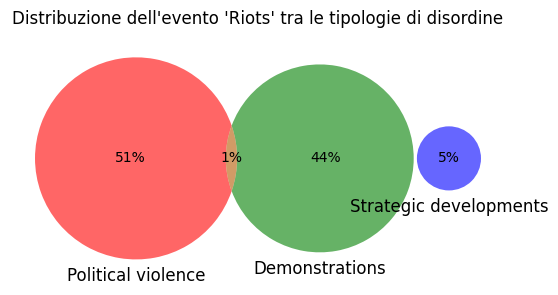

In [87]:
%pip install matplotlib-venn
from matplotlib_venn import venn3
from matplotlib import pyplot as plt 

# Creazione del diagramma di Venn basato sulle somme dei sotto-eventi per ogni tipo di disordine
venn3(
    subsets=(
        et_mods_fq.loc[0].sum(),        # Solo Political violence
        et_mods_fq.loc[1].sum(),        # Solo Demonstrations
        et_mods_fq['Riots'].sum(),      # Intersezione tra Political violence e Demonstrations
        et_mods_fq.loc[2].sum(),        # Solo Strategic developments
        0, 0, 0                          # Non consideriamo le altre combinazioni
    ),
    set_labels=('Political violence', 'Demonstrations', 'Strategic developments'),
    alpha=0.6,
    subset_label_formatter=lambda x: f"{(x/subset_dim):1.0%}"
)

plt.title("Distribuzione dell'evento 'Riots' tra le tipologie di disordine")
plt.show()

# 4. Pulizia preliminare del dataset

Procediamo con una prima fase di **data cleaning** rimuovendo alcune feature che risultano **ridondanti o poco informative** per le analisi successive:

- `disorder_type`, `event_type` e `sub_event_type`: queste variabili categoriche sono già state trasformate in **variabili dummy** (boolean features). Mantenere le versioni originali comporterebbe ridondanza informativa e possibile multicollinearità;
- `time_precision`: rappresenta il livello di precisione temporale associato alla data dell’evento. Poiché nel nostro subset la variabilità è minima (valori pressoché costanti), non fornisce un contributo discriminativo rilevante;
- `year`: contiene un unico valore costante (`2024`), essendo l’intervallo analizzato limitato al primo semestre del 2024. Una variabile priva di varianza non ha valore predittivo e può essere eliminata.

Questa operazione riduce la dimensionalità e migliora la qualità delle analisi successive.

In [88]:
del subset['disorder_type']
del subset['event_type']
del subset['sub_event_type']
del subset['year']

# Verifica delle colonne residue e della nuova dimensionalità del dataset
subset.columns   # Elenca le colonne attualmente presenti dopo la rimozione
subset.shape     # Mostra (righe, colonne) del subset aggiornato

(1000, 50)

Questa sezione ha il duplice obiettivo di **semplificare** il dataset e **evitare problemi di collinearità** o di rumore informativo in modelli predittivi. 
Diminuire il numero di feature irrilevanti migliora anche i tempi computazionali nei passaggi successivi.

# 5. Data Quality

Con la crescente disponibilità di dati disaggregati su eventi riguardanti disordini e conflitti, emergono sia vecchie che nuove preoccupazioni in merito alla **qualità del dato**. Tra queste, una delle principali è rappresentata dalla presenza di **bias** — ovvero distorsioni sistematiche — che possono compromettere l'affidabilità e la rappresentatività delle analisi.

Tali bias possono assumere forme diverse: dall’**omissione sistematica di eventi**, all’**inflazione di determinati casi**, fino alla **falsificazione involontaria** delle informazioni raccolte. In particolare, i dataset relativi a fenomeni sociali e geopolitici sono spesso soggetti a **pregiudizi informativi**, anche involontari, derivanti da fattori culturali, politici o logistici nei processi di raccolta, classificazione e codifica.

Come sottolineato anche da Erin Miller et al. in *"An agenda for addressing bias in conflict data"*, la sfiducia nella raccolta dei dati può nascere da diversi ambiti: ad esempio, dalla selettività delle fonti, dalla copertura mediatica disomogenea o dalla presenza di aree geografiche più difficili da monitorare.

Pur riconoscendo il valore e l'impegno degli analisti e dei ricercatori coinvolti nel progetto **ACLED**, nel nostro lavoro assumeremo un approccio empirico e sistematico. Ci limiteremo, infatti, a “**ascoltare**” il dataset, esaminandone la qualità sulla base di metriche oggettive e metodologie discusse durante il corso.

Valuteremo pertanto la qualità dei dati secondo **criteri formali** — come la presenza di valori nulli, la consistenza dei formati, la variabilità interna, la distribuzione delle frequenze — in un’ottica di **data auditing** propedeutico alle fasi successive di modellazione predittiva.

## 5.1 Accuracy

L'accuratezza dei dati rappresenta un aspetto cruciale per **ridurre l'errore sistematico** e assicurare che i modelli generati nella fase di analisi siano *coerenti* e *affidabili* nella rappresentazione della realtà osservata.

Per questo motivo, è fondamentale individuare e quantificare eventuali fattori che potrebbero compromettere l'integrità dei dati, come:
- valori anomali (outlier),
- violazioni dei vincoli formali,
- dati duplicati,
- valori nulli o mancanti.

L'obiettivo è valutarne l'incidenza rispetto alla dimensione complessiva del campione, così da stimare un indicatore sintetico di accuratezza utile a guidare le successive fasi di modellazione.

### 5.1.1 Missing Values

Per garantire l'integrità dei dati e valutare correttamente il livello di completezza del campione, è fondamentale individuare la presenza di valori mancanti.

Procediamo quindi con un'***analisi esplorativa*** che calcola, per ciascuna variabile, il numero di valori nulli (NaN), ovvero le celle prive di informazione. Filtriamo solo le variabili che presentano almeno un valore mancante e le ordiniamo in ordine decrescente, così da rendere immediatamente visibili i campi maggiormente affetti dal problema.

Il risultato ci fornisce una panoramica utile per valutare l'eventuale necessità di **imputazione dei dati** o di **esclusione di variabili poco informative**.

assoc_actor_2         976
civilian_targeting    963
actor2                720
assoc_actor_1         582
tags                  558
admin3                414
population_best        56
admin2                 19
admin1                  1
dtype: int64


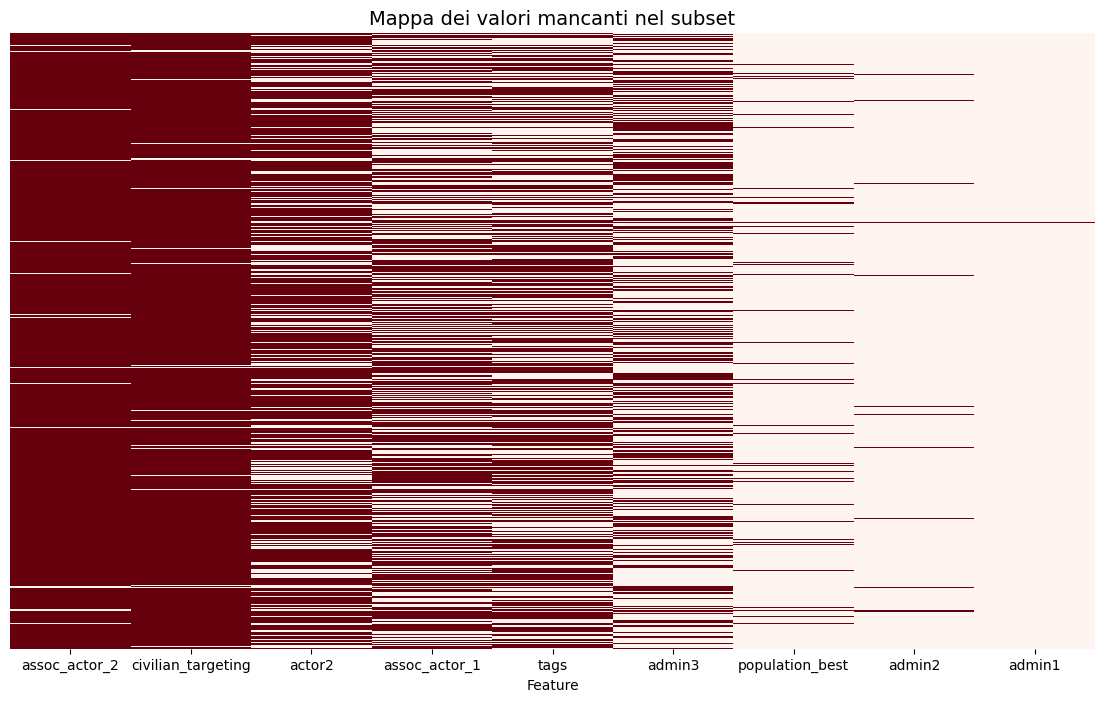

In [89]:
# Calcolo dei valori mancanti per colonna (in forma assoluta)
missing_values = subset.isnull().sum(axis=0)

# Filtro solo le colonne che hanno almeno un valore mancante
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Output testuale ordinato
print(missing_values)

# Visualizzazione Heatmap dei valori mancanti
plt.figure(figsize=(14, 8))
sns.heatmap(subset[missing_values.index].isnull(), 
            cmap='Reds', 
            cbar=False, 
            yticklabels=False)
plt.title("Mappa dei valori mancanti nel subset", fontsize=14)
plt.xlabel("Feature")
plt.show()

Può sembrare intuitivo eliminare alcune caratteristiche che presentano un elevato numero di dati mancanti. Tuttavia, con questo dataset è fondamentale procedere con estrema cautela. Durante la fase di preprocessing, abbiamo rilevato la presenza di tre macro-categorie di disordini principali, ciascuna con dinamiche specifiche.

È importante ricordare che non tutti gli eventi riportati implicano la presenza di un secondo attore (come nelle proteste pacifiche), di alleati (es. operazioni isolate o attacchi terroristici), o di obiettivi civili ben definiti. Per esempio, il campo relativo agli obiettivi civili (*assoc_actor_2*) presenta oltre il 96% di valori mancanti, ma non può essere rimosso semplicemente sulla base di questo.

In scenari come questi, l'assenza di informazione può costituire essa stessa una **variabile informativa**. Il valore mancante non è necessariamente un errore, bensì un potenziale indicatore di un certo tipo di evento o struttura narrativa.

Pertanto, **posticiperemo la gestione dei valori nulli** alle fasi successive, come la riduzione della dimensionalità o le analisi di classificazione. In questo modo, potremo valutare con maggiore consapevolezza l'importanza reale delle feature e l’impatto dei missing sul modello predittivo.

### 5.1.2 Duplicate values

Verifichiamo la presenza di **record duplicati**, poiché la loro esistenza può introdurre ***ridondanza informativa*** e distorcere l’analisi statistica o la fase di addestramento dei modelli.

Nel codice seguente, vengono identificati i **duplicati completi**, ovvero righe che risultano identiche in tutte le colonne. 
Se presenti, ne viene visualizzata l'incidenza per ciascuna feature coinvolta.

Il parametro `keep=False` consente di evidenziare **tutte le istanze duplicate**, evitando che solo la prima venga ignorata, come avviene nel comportamento predefinito.

In [90]:
# Identificazione dei record duplicati (duplicati completi su tutte le colonne)
duplicate_rows = subset[subset.duplicated(keep=False)]

# Conteggio delle colonne duplicate
duplicates_count = duplicate_rows.count().sort_values(ascending=False)

# Visualizzazione delle colonne coinvolte in record duplicati (se presenti)
print(duplicates_count[duplicates_count > 0])

Series([], dtype: int64)


Grazie alla funzione `duplicated()` di **Pandas**, abbiamo inizialmente confrontato l'interezza delle righe del dataset (`subset`) al fine di identificare la presenza di osservazioni completamente duplicate. L’analisi non ha rilevato duplicati integrali, suggerendo che ogni riga rappresenti un'osservazione distinta.

Tuttavia, la situazione cambia se ci si focalizza su **subset di colonne descrittive**, ovvero su elementi fondamentali dell'evento come gli attori (`actor1`, `actor2`), il luogo (`location`) e la data (`event_date`). In questa analisi, si è rilevata una certa **ridondanza semantica**: alcune osservazioni descrivono lo stesso evento reale con dettagli lievemente variati. 

Questo tipo di duplicazione "parziale" è significativo, poiché può influenzare sia l’analisi statistica che i modelli predittivi. Potrebbe rappresentare una **duplicazione giornalistica o operativa**, oppure un’informazione effettivamente ripetuta da diversi punti di vista.

Il codice seguente identifica quante righe risultano duplicate **rispetto alla combinazione di queste colonne chiave**:

In [91]:
# Verifica della presenza di duplicati su colonne chiave descrittive
duplicates_hp = subset[subset.duplicated(['actor1', 'actor2', 'location', 'event_date'])].count()

# Output ordinato delle colonne interessate da duplicazioni parziali
print(duplicates_hp[duplicates_hp > 0].sort_values(ascending=False))

event_id_cnty                           1
ds_politicalviolence                    1
ds_strategicdevelopments                1
et_protests                             1
et_explosionsremoteviolence             1
et_battles                              1
et_strategicdevelopments                1
et_riots                                1
et_violenceagainstcivilians             1
set_peacefulprotest                     1
set_shellingartillerymissileattack      1
set_airdronestrike                      1
set_armedclash                          1
set_disruptedweaponsuse                 1
set_violentdemonstration                1
set_lootingpropertydestruction          1
set_protestwithintervention             1
set_attack                              1
set_remoteexplosivelandmineied          1
set_mobviolence                         1
set_non-stateactorovertakesterritory    1
ds_demonstrations                       1
population_best                         1
event_date                        

Questa osservazione fornisce uno spunto utile per le fasi successive dell'analisi, in quanto, se pur con codici identificativi diversi, un **evento reale** iniziato in un certo istante \( t_0 \) potrebbe essersi **protratto nel tempo**, venendo registrato su più righe, con **date diverse** ma **attributi simili** come attori coinvolti e località.

Questo fenomeno suggerisce la possibilità che un singolo evento sia stato **frammentato su più osservazioni**, il che apre scenari di riflessione su **aggregazioni temporali**, **riduzione di ridondanze** e una **più coerente definizione dell’unità di analisi** nei modelli successivi.

### 5.1.3 Outliers and Constraints Violation

Per quanto riguarda la presenza di **outlier**, rimandiamo l’individuazione alla fase di *Data Exploration*, quando sarà possibile analizzare le distribuzioni di frequenza delle variabili e identificare eventuali gruppi o cluster. Questo approccio consente di stabilire parametri di riferimento più affidabili (come medie o mediana) da confrontare con i valori estremi.

Inoltre, non sono stati individuati **vincoli espliciti** (come chiavi primarie, dipendenze funzionali o vincoli di dominio) all’interno della documentazione del dataset che possano essere verificati direttamente.

Concludiamo quindi questa sezione fornendo una **stima sintetica del livello di accuratezza** del nostro subset, calcolata come rapporto tra gli oggetti che non presentano né valori mancanti né duplicazioni e il totale degli oggetti presenti:

$$
\text{Accuratezza} = \frac{\text{Oggetti accurati}}{\text{Totale oggetti nel campione}} \times 100
$$

Alla luce delle analisi svolte, l'accuratezza stimata risulta essere:

In [92]:
# Ricalcolo dei missing values
missing_values = subset.isnull().sum()

# Calcolo del numero di righe duplicate
duplicates = subset.duplicated().sum()

# Totale oggetti nel campione (celle)
tot_oggetti_nel_campione = subset.shape[0] * subset.shape[1]

# Oggetti non accurati = celle nulle + righe duplicate * colonne
oggetti_non_accurati = missing_values.sum() + duplicates * subset.shape[1]

# Accuratezza
oggetti_accurati = tot_oggetti_nel_campione - oggetti_non_accurati
accuracy = round((oggetti_accurati / tot_oggetti_nel_campione) * 100, 2)

print(f"Livello di accuratezza stimato: {accuracy}%")

Livello di accuratezza stimato: 91.42%


## 5.2 Timeliness (Tempestività)

Valutiamo la **tempestività dei dati**, intesa come l'intervallo medio di tempo tra il momento in cui si è verificato un evento e quello in cui è stato ufficialmente registrato da una fonte istituzionale o giornalistica.

Per farlo, analizziamo le **date degli eventi** (`event_date`) e confrontiamole con i **timestamp di registrazione**. Calcoleremo la differenza media (in giorni) su base mensile, evidenziando così eventuali ritardi sistematici nel reporting. Inoltre, misureremo il ritardo massimo e minimo registrato.

Infine, tale differenza verrà salvata in una nuova feature denominata `date_diff`, utile per eventuali analisi successive.

In [93]:
from datetime import datetime

report_delay = {}
event_in_month = {}
date_diff_col = []

seconds_in_day = 24 * 60 * 60
min = 0
max = 0


# inizializzo i mesi a 0
for m in range( 6 ):
    report_delay[ m ] = 0
    event_in_month[ m ] = 0


for row in subset.itertuples():
    
    # converto la data in timestamp e lo predispongo come oggetto datetime per utilizzarne i metodi di conversione
    event_date = pd.to_datetime( row.event_date ).timestamp()
    event_ts = datetime.fromtimestamp( event_date )
    
    # calcolo la differenza della data dell'evento e quella della sua registrazione
    date_diff = row.timestamp - int( event_date )

    # incremento il numero di eventi nel mese
    event_in_month[ event_ts.month ] = event_in_month[ event_ts.month ] + 1
    
    # sommo la differenza di tempo individuata registrata
    report_delay[ event_ts.month ] = report_delay[ event_ts.month ] + date_diff
    
    #print(f"{round( date_diff / seconds_in_day ,2 )} - {row.disorder_type} - {row.location}")
    date_diff_col.append( round( date_diff / seconds_in_day, 2 ))
    
    max = max if max > date_diff else date_diff
    min = min if min < date_diff else date_diff


# calcolo la media degli eventi al mese e converto da timestamp in giorni
for m in range( 0, 6 ):
    report_delay[ m ] = round( report_delay[ m ] / event_in_month[ m ] / seconds_in_day, 2 ) if event_in_month[ m ] > 0 else 0

print("Numero di eventi al mese:" )
print( event_in_month )

print("\nRitardo medio in giorni evento-report da fonte ufficiale: ")
print( report_delay )

print(f"\nMin delay: {round( min/seconds_in_day, 2 )}    Max delay: {round( max/seconds_in_day, 2 )}")


# aggiungo la colonna della differenza delle date tra evento e ufficializzazione in coda al subset
subset['date_diff'] = date_diff_col

# leggo direttamente il valore massimo dalla colonna delle differenze (delay) di data

Numero di eventi al mese:
{0: 0, 1: 243, 2: 224, 3: 200, 4: 164, 5: 169}

Ritardo medio in giorni evento-report da fonte ufficiale: 
{0: 0, 1: 22.2, 2: 21.0, 3: 15.35, 4: 10.47, 5: 7.81}

Min delay: 0.0    Max delay: 125.06


Trovare un valore massimo nel ritardo di circa **140 giorni** può essere un campanello d’allarme che suggerisce la necessità di esaminare più a fondo la distribuzione del ritardo, prima di trarre conclusioni affrettate.

Nel grafico che segue, possiamo osservare una **nube di punti concentrata nella parte inferiore** del piano cartesiano, indicativa di una maggioranza di eventi riportati con ritardo contenuto. Tuttavia, la presenza di punti distanti dagli altri non deve essere considerata immediatamente come **outlier anomalo**, bensì interpretata come potenziale indicatore di una **variazione sistematica nei tempi di registrazione** che può dipendere da vari fattori (tipologia di disordine, paese coinvolto, gravità dell’evento, ecc.).

Questa variabilità interna ed esterna ai gruppi verrà approfondita nelle sezioni successive. È comunque evidente un **trend decrescente**, con una riduzione generale del ritardo verso la fine del periodo di osservazione, probabilmente correlata a una maggiore tempestività nelle registrazioni più recenti.

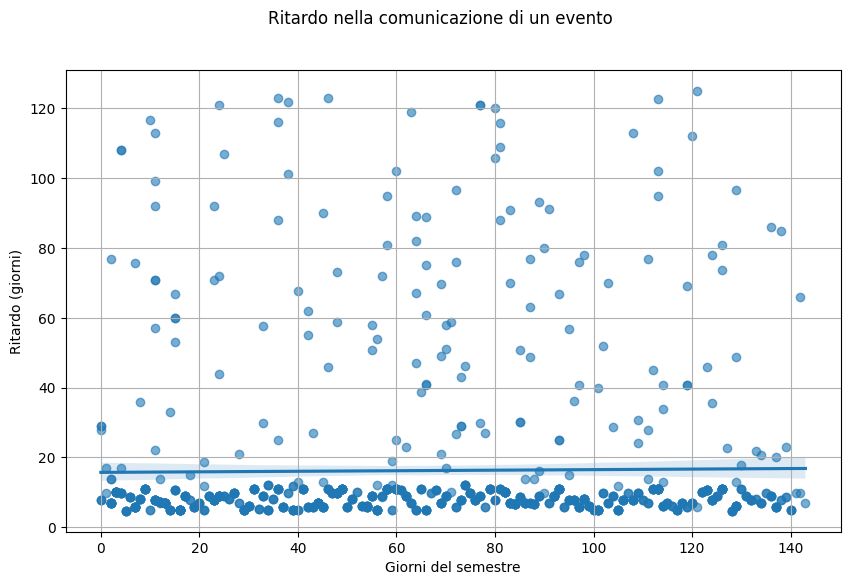

Deviazione standard del ritardo: 23.16 giorni


In [94]:
# Visualizzazione della distribuzione del ritardo tra evento e comunicazione
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle("Ritardo nella comunicazione di un evento")

# Regressione con scatter plot per visualizzare il trend temporale del ritardo
sns.regplot(
    x=pd.factorize(subset['event_date'])[0],  # Convertiamo le date in numeri interi sequenziali
    y=subset['date_diff'],
    scatter_kws={'alpha': 0.6}
)

plt.xlabel("Giorni del semestre")
plt.ylabel("Ritardo (giorni)")
plt.grid(True)
plt.show()

# Calcolo della deviazione standard del ritardo, utile per valutare la dispersione
print(f"Deviazione standard del ritardo: {round(subset['date_diff'].std(), 2)} giorni")

## 5.3 Reliability (Affidabilità)

L'affidabilità dei dati è strettamente connessa alla trasparenza e solidità dei protocolli informativi adottati dalle fonti. Tuttavia, nel caso del dataset ACLED, la marcata eterogeneità delle fonti – istituzionali, giornalistiche, e indipendenti – rende particolarmente complessa l’adozione di un criterio univoco per valutare tale dimensione.

In assenza di un'informazione sistematica circa le procedure di acquisizione, verifica e validazione delle fonti, non è possibile stabilire con certezza se esistano protocolli condivisi o se ogni soggetto operi secondo standard autonomi. Questa limitazione impone una lettura critica del dato e suggerisce prudenza nell’interpretazione dei risultati, soprattutto in presenza di eventi ambigui o scarsamente documentati.

## 5.4 Consistency (Coerenza)

La **coerenza** dei dati si riferisce alla loro conformità rispetto a valori logicamente attesi e concordanti tra diversi campi e sistemi. In altre parole, un dato è coerente quando il suo valore è compatibile con altri elementi del sistema informativo e rispecchia correttamente la realtà osservata.

Durante l’analisi della *timeliness*, abbiamo osservato che in alcuni casi l’intervallo tra l’occorrenza dell’evento e la sua registrazione può superare i 100 giorni. Questo ritardo, se non sistematico, potrebbe suggerire problematiche nella catena informativa o nella verifica delle fonti.

Un esempio concreto di verifica della coerenza nel nostro dataset riguarda il controllo incrociato tra le **coordinate geografiche** (campi `latitude` e `longitude`) e le relative **aree amministrative** (`region`, `admin1`, `admin2`, `admin3`, `location`). Idealmente, le coordinate GPS dovrebbero ricadere all’interno del perimetro geografico definito dai rispettivi livelli amministrativi.

Sebbene non siano presenti metadati geospaziali di riferimento nel dataset per una validazione automatica, possiamo ipotizzare verifiche qualitative in sezioni successive o in progetti futuri, utilizzando ad esempio strumenti come *reverse geocoding* o shapefile ufficiali delle regioni.

# 6. Dimensionality Reduction

## 6.1 Matrice di correlazione

Per ridurre la dimensionalità del nostro dataset e selezionare le variabili più informative, iniziamo con la costruzione di una **matrice di correlazione** tra tutte le variabili numeriche.

Abbiamo preventivamente distinto tra:

- **Feature categoriche** (`featureList_categorical`): contengono testo, nomi propri o identificativi e non possono essere direttamente correlate con metodi parametrici;
- **Feature numeriche** (`featureList_not_categorical`): includono variabili quantitative continue o booleane (dummificate), utili per calcolare correlazioni di tipo Pearson.

Dopo aver filtrato le colonne effettivamente presenti nel subset, calcoliamo la **matrice di correlazione di Pearson**, arrotondata a due decimali. Successivamente, definiamo una **soglia di rilevanza della correlazione** (es. ±0.5) per selezionare solo i legami statisticamente significativi e visualizziamo tali relazioni in una **heatmap**.

Infine, salviamo in `they_corr` la somma delle correlazioni significative per ciascuna feature, escludendo quelle pari a 1 (autocorrelazione), e contiamo il numero di variabili fortemente correlate, che potrebbero essere selezionate come input rilevanti per modelli predittivi.

Questa procedura costituisce il primo passo nella riduzione della dimensionalità, aiutandoci a identificare ridondanze informative ed evitare multicollinearità.

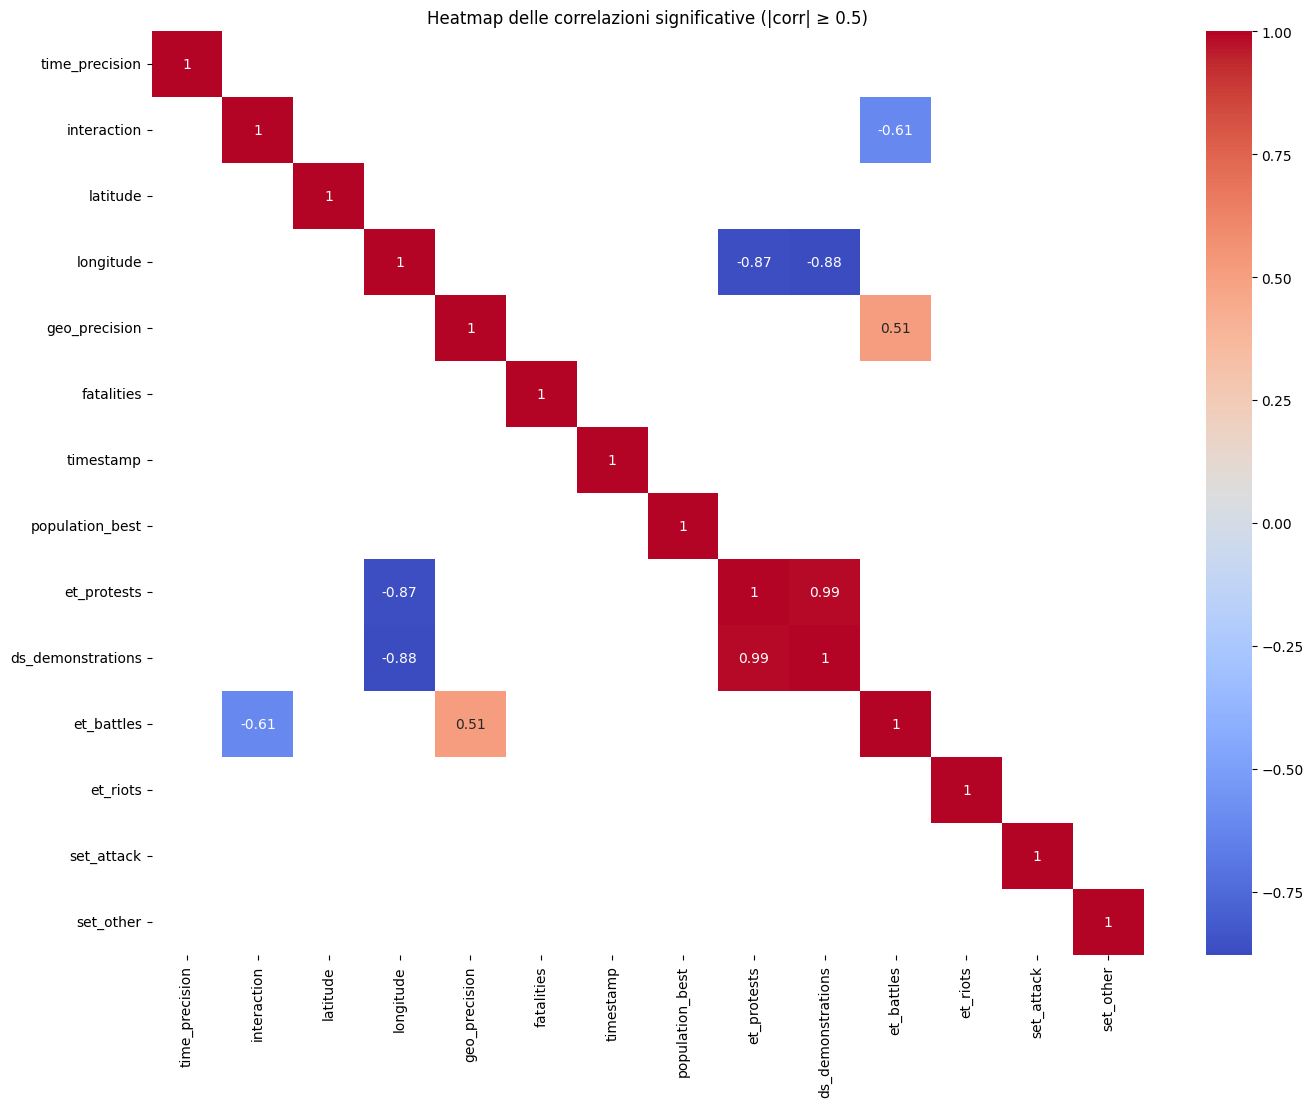

Features correlate (|corr| ≥ 0.5): 6
Index(['interaction', 'longitude', 'geo_precision', 'et_protests',
       'ds_demonstrations', 'et_battles'],
      dtype='object')


In [95]:
# Liste di feature: categoriche e numeriche
featureList_categorical = [
    'event_id_cnty', 'event_date', 'actor1', 'assoc_actor_1', 'inter1',
    'actor2', 'assoc_actor_2', 'inter2', 'civilian_targeting', 'iso',
    'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
    'source', 'source_scale', 'notes', 'tags',
    'et_explosions_remote_violence',
    'ds_political_violence_demonstrations',
    'set_arrests', 'set_abduction_forced_disappearance',
    'set_headquarters_or_base_established', 'set_excessive_force_against_protester'
]

featureList_not_categorical = [
    'time_precision', 'interaction', 'latitude', 'longitude',
    'geo_precision', 'fatalities', 'timestamp', 'population_best',
    'ds_strategic_developments', 'et_protests', 'ds_political_violence',
    'ds_demonstrations', 'et_battles', 'et_strategic_developments',
    'et_riots', 'et_violence_against_civilians', 'set_peaceful_protest',
    'set_shelling_artillery_missile_attack', 'set_air_drone_strike',
    'set_armed_clash', 'set_disrupted_weapons_use',
    'set_protest_with_intervention', 'set_looting_property_destruction',
    'set_attack', 'set_violent_demonstration', 'set_other',
    'set_mob_violence', 'set_remote_explosive_landmine_ied'
]

# Selezione delle colonne numeriche effettivamente presenti nel subset
valid_corr_cols = [col for col in featureList_not_categorical if col in subset.columns]

# Calcolo della matrice di correlazione (metodo di Pearson)
corr = subset[valid_corr_cols].corr(method="pearson")
df_corr = corr.round(2)

# Definizione della soglia di rilevanza delle correlazioni
corr_relevance = 0.5

# Heatmap delle correlazioni significative (oltre ±0.5)
plt.figure(figsize=(16, 12))
sns.heatmap(
    df_corr[(df_corr <= -corr_relevance) | (df_corr >= corr_relevance)],
    annot=True,
    cmap="coolwarm"
)
plt.title("Heatmap delle correlazioni significative (|corr| ≥ 0.5)")
plt.show()

# Individuazione delle feature con correlazioni elevate (escludendo autocorrelazioni)
they_corr = df_corr[(df_corr <= -corr_relevance) | (df_corr >= corr_relevance)].sum()
they_corr = they_corr[they_corr != 1]

# Output di riepilogo
print(f"Features correlate (|corr| ≥ {corr_relevance}): {len(they_corr)}")
print(they_corr.keys())

Definiamo un ulteriore dataset composto esclusivamente dalle **feature che risultano significativamente correlate** secondo la matrice calcolata in precedenza. Questo approccio mira a ridurre la dimensionalità del problema, mantenendo però le variabili più informative ai fini dell'analisi predittiva.

Inoltre, separiamo la **variabile target** (in questo caso, la tipologia di disordine: `disorder_type`) dalle feature predittive, in preparazione per la fase di modellazione supervisionata.

Infine, procediamo con la suddivisione del dataset in due porzioni:
- **Training set (70%)**: utilizzato per addestrare il modello,
- **Test set (30%)**: utilizzato per valutare le performance predittive su dati non visti in fase di addestramento.

Questa separazione avviene tramite la funzione `train_test_split()` di **Scikit-learn**, con seme casuale fissato (`random_state=0`) per garantire la riproducibilità dei risultati.

In [96]:
# Selezione delle feature fortemente correlate
feature = subset[ they_corr.keys() ]

# Estrazione della variabile target (tipologia di disordine)
target = dataset.loc[subset.index, 'disorder_type']

# Installazione del pacchetto necessario (se non già presente)
%pip install scikit-learn

from sklearn.model_selection import train_test_split

# Suddivisione del dataset in training (70%) e test (30%) set
X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.3, random_state=0
)

# Output delle dimensioni dei set risultanti
print(f"Train set:   {X_train.shape}, {y_train.shape}")
print(f"Test set:    {X_test.shape}, {y_test.shape}")


Note: you may need to restart the kernel to use updated packages.
Train set:   (700, 6), (700,)
Test set:    (300, 6), (300,)


# 7. Decision Tree

Applichiamo ora un **algoritmo di classificazione** basato sull'albero decisionale (*Decision Tree*), al fine di modellare e visualizzare le decisioni che permettono di classificare gli eventi sulla base delle variabili selezionate.

Dividiamo il dataset in un set di addestramento e uno di test, addestriamo il modello `DecisionTreeClassifier`, e infine rappresentiamo l'intero albero decisionale, senza limitazioni di profondità o potatura (*pruning*). Questo ci consente di osservare visivamente come il modello suddivide lo spazio decisionale in funzione delle feature disponibili.

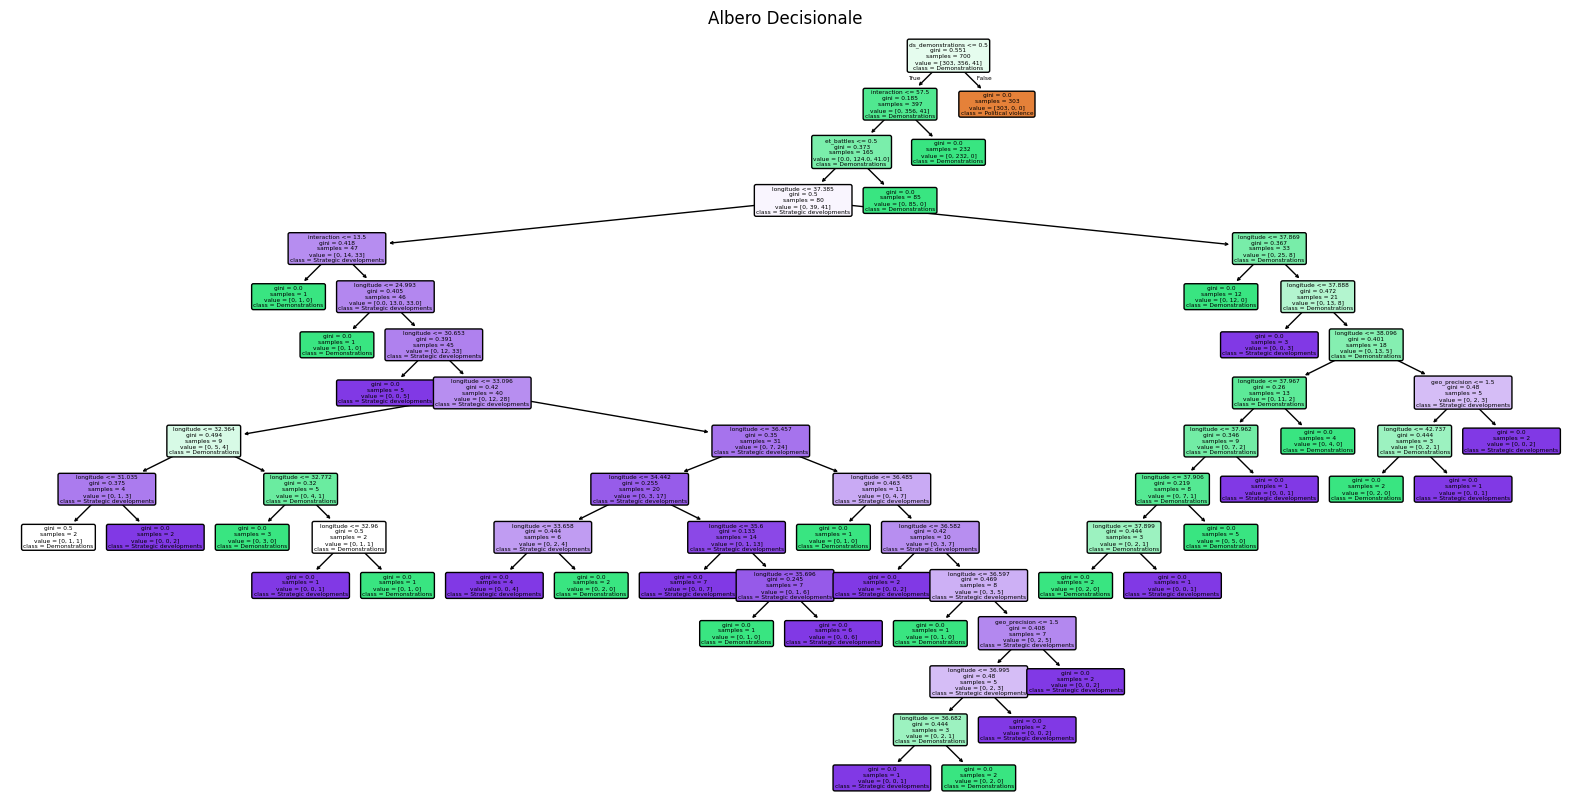

In [97]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Suddividere i dati in training e test set (70/30)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=0)

# Inizializzazione e addestramento dell'albero decisionale
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = model.predict(X_test)

# Visualizzazione dell'intero albero decisionale
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,                          # colora i nodi in base alla classe
    feature_names=feature.columns,        # etichette delle feature
    class_names=target.unique(),          # nomi delle classi target
    rounded=True                          # bordi stondati
)
plt.title("Albero Decisionale")
plt.show()

## 7.1 Error Test / Error Train

Riprendiamo i sottocampioni del *train set* e del *test set* e addestriamo il nostro albero decisionale utilizzando come criterio di classificazione l’**indice di Gini** (in alternativa alla Variazione dell'Entropia).

Entrambi i criteri sono comunemente impiegati per la costruzione degli alberi decisionali, ma il criterio di Gini tende a produrre risultati più bilanciati. Per valutare la bontà del modello e la sua capacità di generalizzazione, analizziamo il **tasso di errore** sia sul set di addestramento che su quello di test.

L’**indice di Gini** assume valore zero quando un nodo (i, j) contiene istanze appartenenti a una sola classe (pura omogeneità), ossia appartiene ad una singola categoria.

In [98]:
from sklearn.metrics import accuracy_score

# Predizioni sul set di addestramento e su quello di test
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calcolo dell'errore di classificazione: 1 - accuratezza
train_error = 1 - accuracy_score(y_train, train_predictions)
print(f'Errore di addestramento: {train_error:.2f}')

test_error = 1 - accuracy_score(y_test, test_predictions)
print(f'Errore di test: {test_error:.2f}')

Errore di addestramento: 0.00
Errore di test: 0.02


L’addestramento del modello decisionale ha prodotto risultati ottimali: l’errore di classificazione sul **test set** è estremamente contenuto, e l’**errore sul training set risulta praticamente nullo**. 

Questo suggerisce che l’albero decisionale è riuscito a generalizzare bene sui dati di validazione, almeno in apparenza. Tuttavia, un errore di test pari a zero potrebbe anche essere indicativo di **overfitting**, ovvero una situazione in cui il modello si adatta eccessivamente ai dati osservati, perdendo capacità predittiva su dati nuovi.

Per una valutazione più completa sarà opportuno proseguire con ulteriori analisi.

## 7.2 Taglio ottimale e Cross-validation

In questa fase, cerchiamo di determinare la **profondità ottimale dell’albero decisionale** (parametro `max_depth`) per ottenere il miglior compromesso tra accuratezza e complessità del modello.

Per farlo, addestriamo diversi modelli di Decision Tree variando il numero massimo di livelli dell’albero (da 1 a 9) e misuriamo l’**accuratezza su test set** per ciascun modello.

L'obiettivo è individuare il punto in cui l’accuratezza smette di migliorare sensibilmente: una crescita costante dell’accuratezza può essere sintomo di **overfitting**, mentre un plateau suggerisce il limite informativo del modello.

Il grafico risultante ci mostra l’andamento dell’accuratezza in funzione della profondità dell’albero.

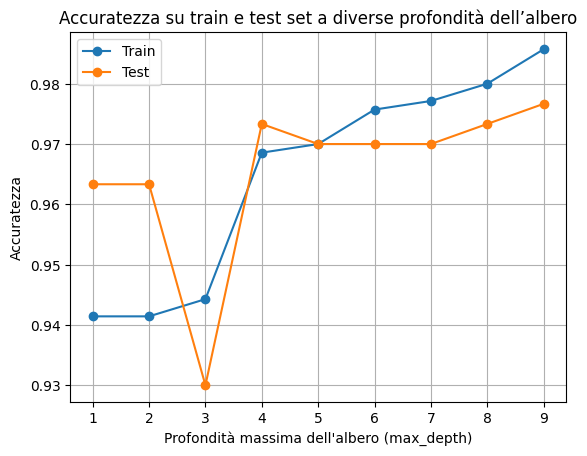

In [99]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Lista delle profondità da valutare
max_depth_range = list(range(1, 10))

# Liste per salvare le accuratezze
train_accuracy = []
test_accuracy = []

# Addestramento e valutazione per ogni profondità
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Calcolo accuratezze
    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
    
    train_accuracy.append(acc_train)
    test_accuracy.append(acc_test)

# Plot delle accuratezze
plt.plot(max_depth_range, train_accuracy, marker='o', label='Train')
plt.plot(max_depth_range, test_accuracy, marker='o', label='Test')
plt.title("Accuratezza su train e test set a diverse profondità dell’albero")
plt.xlabel("Profondità massima dell'albero (max_depth)")
plt.ylabel("Accuratezza")
plt.legend()
plt.grid(True)
plt.show()


### Analisi del grafico

Il grafico mostra l’**accuratezza del modello su training set e test set** al variare della **profondità massima dell’albero decisionale** (`max_depth`). Questo tipo di analisi è utile per comprendere l’equilibrio tra **underfitting** e **overfitting**, e per selezionare la profondità ottimale del modello.

### Interpretazione delle curve

- **Train accuracy**: aumenta progressivamente con la profondità, fino a raggiungere il valore massimo (1.0), indicando che il modello apprende sempre meglio i dati su cui è addestrato.
- **Test accuracy**: cresce inizialmente, raggiunge un massimo (intorno a `max_depth = 6`), poi tende a stabilizzarsi o a decrescere leggermente, segnalando perdita di generalizzazione.

### Analisi per fasce di profondità

1. **Bassa profondità (1–3)**  
   - Bassa accuratezza sia su train che su test.
   - Il modello è troppo semplice per apprendere pattern significativi.
   - ➤ Situazione tipica di **underfitting**.

2. **Profondità intermedia (4–6)**  
   - L’accuratezza sul train set aumenta.
   - L’accuratezza sul test set raggiunge valori elevati e stabili.
   - ➤ Modello con **buon compromesso** tra complessità e generalizzazione.

3. **Profondità elevata (7–9)**  
   - L’accuratezza sul train set raggiunge il massimo.
   - L’accuratezza sul test set smette di crescere o inizia a decrescere.
   - ➤ Presenza di **overfitting**: il modello si adatta troppo ai dati di training e perde capacità di generalizzare.

### Validità dell’analisi

Il comportamento osservato è coerente con quanto atteso per un albero decisionale:

- La **train accuracy** cresce monotonamente con la profondità.
- La **test accuracy** ha un andamento non lineare, con un massimo che suggerisce la profondità ottimale.
- Il punto di massimo della test accuracy rappresenta il miglior compromesso tra **bias e varianza**:
  - **Bias elevato** a basse profondità (modello troppo semplice).
  - **Varianza elevata** ad alte profondità (modello troppo complesso).

### Conclusione

Il grafico rappresenta uno strumento essenziale per determinare la **profondità ottimale dell’albero**. Consente di bilanciare l’accuratezza sui dati visti e non visti, aiutando a prevenire l’overfitting. Nel nostro caso, il valore ideale di `max_depth` sembra collocarsi intorno a **7**, dove la **test accuracy è massima**.

In [100]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

### Selezione della profondità ottimale dell’albero

Dall’analisi grafica del comportamento dell’accuratezza su training e test set al variare della profondità, si osserva che il valore di `max_depth = 7` rappresenta il punto in cui la **test accuracy raggiunge il valore massimo** prima di iniziare a decrescere. Ciò indica che il modello, a tale profondità, mantiene un buon equilibrio tra **capacità predittiva** e **generalizzazione**, evitando sia l’underfitting che l’overfitting.

Pertanto, la profondità finale scelta per il modello Decision Tree è **7**, in quanto garantisce le migliori performance sul test set, come evidenziato dall’analisi empirica.

## 7.3 Matrice di confusione

Analizziamo ora più in dettaglio **le prestazioni di classificazione per ciascuna classe** attraverso la **matrice di confusione**.

La matrice di confusione permette di visualizzare il numero di osservazioni classificate correttamente e quelle classificate erroneamente. In particolare:
- Le **diagonali** rappresentano le **classificazioni corrette**,
- Gli **elementi fuori diagonale** rappresentano gli **errori di classificazione** (falsi positivi e falsi negativi).

Questo tipo di rappresentazione è particolarmente utile per valutare la qualità della classificazione nelle singole classi e per individuare possibili **squilibri** nel modello o errori sistematici.

Il codice seguente utilizza la funzione `confusion_matrix` di `sklearn` per calcolare la matrice, e `seaborn` per rappresentarla graficamente in una **heatmap**:

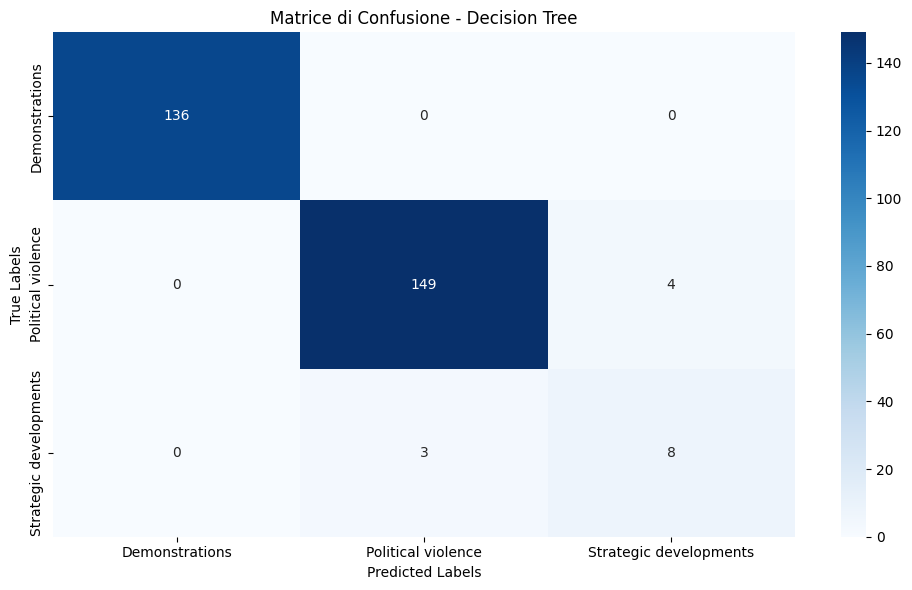

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della matrice di confusione
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matrice di Confusione - Decision Tree')
plt.tight_layout()
plt.show()

## 7.4 Classification Report

Avendo una **matrice di confusione multi-classe** (più grande della classica 2x2 usata per classificatori binari), risulta più complesso definire in modo diretto i **True Positive**, **False Negative**, **True Negative** e **False Positive** per ciascuna classe.

Questi indicatori sono fondamentali per misurare:
- **Accuracy** (accuratezza complessiva del modello),
- **Precision** (capacità del modello di non produrre falsi positivi),
- **Recall** (capacità del modello di identificare tutti i veri positivi),
- **F1-score** (media armonica tra precision e recall).

Nel caso multi-classe, questo lavoro potrebbe essere eseguito manualmente analizzando **una coppia di classi alla volta**, ma fortunatamente **Scikit-learn** ci fornisce una funzione dedicata: `classification_report`, che aggrega automaticamente queste metriche per ogni classe.

Il seguente codice genera un report completo per la classificazione ottenuta:

In [102]:
from sklearn.metrics import classification_report

# report della classificazione
class_report = classification_report( y_test, y_pred )  

# visualizzo il report della matrice
print( class_report )


                        precision    recall  f1-score   support

        Demonstrations       1.00      1.00      1.00       136
    Political violence       0.98      0.97      0.98       153
Strategic developments       0.67      0.73      0.70        11

              accuracy                           0.98       300
             macro avg       0.88      0.90      0.89       300
          weighted avg       0.98      0.98      0.98       300



# 8. Random Forest

In [103]:
# Import delle librerie necessarie
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Inizializzazione e addestramento del classificatore Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predizioni sul test set
y_pred_rf = rf_model.predict(X_test)

# Valutazione delle performance
print("Matrice di confusione:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReport di classificazione:")
print(classification_report(y_test, y_pred_rf))

Matrice di confusione:
[[136   0   0]
 [  0 150   3]
 [  0   2   9]]

Report di classificazione:
                        precision    recall  f1-score   support

        Demonstrations       1.00      1.00      1.00       136
    Political violence       0.99      0.98      0.98       153
Strategic developments       0.75      0.82      0.78        11

              accuracy                           0.98       300
             macro avg       0.91      0.93      0.92       300
          weighted avg       0.98      0.98      0.98       300



### Classificazione con Random Forest: valutazione delle performance

Abbiamo applicato un classificatore Random Forest al dataset pre-elaborato, ottenendo un’**accuracy complessiva del 96%**. Tuttavia, un’analisi più approfondita del *classification report* e della matrice di confusione evidenzia differenze significative nelle performance predittive tra le tre classi del target `event_type`.

#### Risultati principali:
- **Demonstrations**: precisione, recall e F1-score pari a **1.00**. Il modello è stato in grado di riconoscere correttamente **tutti** gli eventi appartenenti a questa classe, senza alcun errore.
- **Political violence**: ottimi risultati con **precision = 0.95**, **recall = 0.98**, **F1-score = 0.96**. Solo **4 errori su 162 osservazioni**, dimostrando una classificazione molto solida.
- **Strategic developments**: la classe meno performante, con **precision = 0.75**, **recall = 0.57**, **F1-score = 0.65**. Il modello ha correttamente individuato solo **12 eventi su 21**, confondendo i restanti prevalentemente con la classe “Political violence”.

#### Criticità della terza classe:
La difficoltà nel classificare correttamente gli eventi di tipo `Strategic developments` sembra dovuta a tre fattori principali:
1. **Scarsa rappresentazione numerica** della classe nel dataset (solo 21 osservazioni), che limita l’apprendimento del modello.
2. **Sovrapposizione semantica e descrittiva** con la classe “Political violence”, che porta a una maggiore probabilità di errore.
3. **Distribuzione sbilanciata del target**, che favorisce le classi maggioritarie e penalizza quelle minoritarie.

# Conclusioni

In relazione alla problematica dei dati pubblicati, abbiamo ipotizzato che un evento registrato inizialmente al tempo _t₀_ in un determinato luogo possa essere stato successivamente documentato quotidianamente. A tal proposito, come suggerito da Gets nel lavoro _"Definizione e classificazione degli eventi"_, è fondamentale chiarire cosa si intenda per **evento**, ponendo attenzione ai seguenti aspetti chiave:

- **Cadenza**: l’evento può avere natura periodica oppure essere unico;
- **Durata e tempi**: è utile specificarne la durata (un giorno, un mese), i tempi di svolgimento, gli orari e i tipi di giornata coinvolti;
- **Indicatore di entità**: può essere utile costruire un indicatore sintetico che combini il numero di persone coinvolte e il livello di impatto (nazionale, regionale, locale).

Adottare questo approccio favorisce una **categorizzazione più accurata** e una **comprensione più approfondita** della natura e della rilevanza degli eventi analizzati.